# Fitting an Individual Power Spectrum

In this example, we will fit an individual power spectrum model.

## Load Python libraries

First, we will load the Python modules we need for this example.

In [2]:
# Import some useful standard library modules
import os
from pathlib import Path

# Import some general scientific python libraries
import numpy as np
import pandas as pd

# Import the parameterization model object
from fooof import FOOOF

### Check specparam version

In [3]:
import fooof
print(fooof.__version__)

1.0.0


## Set data path

Next, we can set the path to where the data is available.

In [5]:
# Check working directory
os.getcwd()

In [6]:
# Set the data path to load from
data_path = Path('../Data/')

## Load invididual PSD

Load CSV files, including:
- `freqs.csv`, which contains a vector of frequencies
- `indvPSD.csv`, which contains the power values for an individual power spectrum

In [8]:
# Load data
freqs = np.ravel(pd.read_csv(data_path / "freqs.csv"))
spectrum = np.ravel(pd.read_csv(data_path / "indv.csv"))[1:101]  

In [9]:
# Check shapes of loaded data
print(freqs.shape)
print(spectrum.shape)

(99,)
(99,)


## Parameterize a power spectrum

Now we can parameterize our power spectrum!

In [10]:
# Initialize a model object for spectral parameterization, with some settings 
fm = FOOOF(peak_width_limits = [2, 8], max_n_peaks = 6, min_peak_height = 0.05, verbose = False)  

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          2.1629, 1.9838                                          
                                                                                                  
                                       2 peaks were found:                                        
          

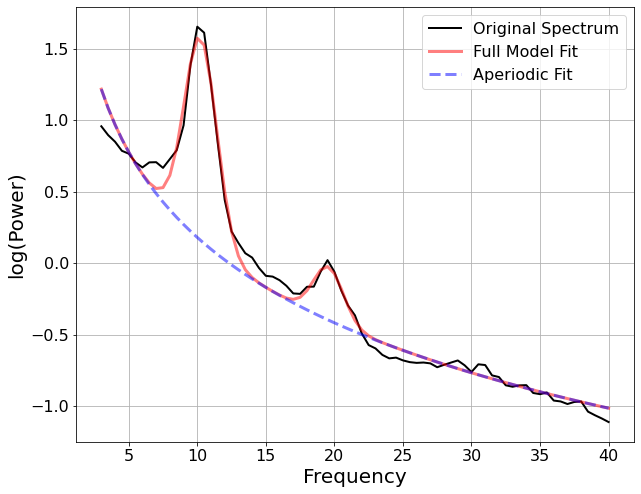

In [11]:
# Fit individual PSD over 3-40 Hz range      
fm.report(freqs, spectrum, [3, 40])

In [13]:
# Save out a copy of the model fit report
fm.save_report('INDV_demo', file_path= '../Output')

# The following line can also be used to save out the model plot
#fm.plot(save_fig = True, file_name = 'INDV_demo', file_path = '../Output')

## Access model fit information

All of the model fit information is saved to the model object. 

Note that all attributes learned in the model fit process have a trailing underscore. 

In [14]:
# Access the model fit parameters from the model object
print('Aperiodic parameters: \n', fm.aperiodic_params_, '\n')
print('Peak parameters: \n', fm.peak_params_, '\n')
print('Goodness of fit:')
print('Error - ', fm.error_)
print('R^2   - ', fm.r_squared_, '\n')
print('Number of fit peaks: \n', fm.n_peaks_)

Aperiodic parameters: 
 [2.1629177  1.98379764] 

Peak parameters: 
 [[10.23978701  1.39291459  2.38094088]
 [19.5665069   0.37190755  2.19414183]] 

Goodness of fit:
Error -  0.05826545024516166
R^2   -  0.9891330639339952 

Number of fit peaks: 
 2


## Extract periodic and aperiodic parameters

Another way to access model fit parameters is to use the `get_params` method, which can be used to access model fit attributes. 

In [15]:
# Extract aperiodic and periodic parameter
aps = fm.get_params('aperiodic_params')
peaks = fm.get_params('peak_params')

In [16]:
# Extract goodness of fit information 
err = fm.get_params('error')
r2s = fm.get_params('r_squared')

In [17]:
# Extract specific parameters
exp = fm.get_params('aperiodic_params', 'exponent')   
cfs = fm.get_params('peak_params', 'CF')

In [18]:
# Extract parameterized power spectrum
spec= fm.fooofed_spectrum_[3:40]

In [19]:
# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, specparam fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error = err, exponent = exp, 
                      cfs = ' & '.join(map(str, [round(CF, 2) for CF in cfs]))))

With an error level of 0.06, specparam fit an exponent of 1.98 and peaks of 10.24 & 19.57 Hz.


## Save files

The model object also has I/O utilities for saving and reloading data. 

The `save` method can be used to save out data from the object, specifying which information to save. 

In [29]:
# Save out the settings used to fit the model
fm.save('fit_settings', save_settings = True, file_path= '../Output')

In [30]:
# Save out the results of the model fit
fm.save('fit_results', save_results = True, file_path= '../Output')

In [31]:
# Save out a copy of the data used to fit the model
fm.save('fit_data', save_data = True, file_path= '../Output')

Another option is to save out data as a .csv rather than the default .json file format, the preferred format for specparam model outputs.   

In [26]:
# Save out aperiodic parameter results
aper = pd.DataFrame(aps).transpose()
aper.columns = ['offset', 'exponent']
aper.to_csv('../Output/INDV_demo_aper.csv')

In [27]:
# Save out periodic parameter results
per = pd.DataFrame(peaks)
per.columns = ['CF', 'PW', 'BW']
per.to_csv('../Output/INDV_demo_per.csv')

In [28]:
# Save out model fit results
fit = pd.DataFrame([r2s, err]).transpose()
fit.columns = ['r2', 'error']
fit.to_csv('../Output/INDV_demo_fits.csv')

## Reload 

We can also check our saved out results by reloading them. 

In [37]:
# Reload the saved out model result
nfm = FOOOF()
nfm.load('fit_results', file_path= '../Output')

In [38]:
# Check the results of the reloaded model fit
nfm.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 35 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          2.0909, 1.9141                                          
                                                                                                  
                                       2 peaks were found:                                        
          